   # ANALYSING & VISUALISING E-COMMERCES DATA

# Task
• What is the best-selling category?

• Visualize payment method and order status frequency

• Find a correlation between payment method and order status

• Find a correlation between order month and item category

• Find any hidden patterns that are counter-intuitive for a layman

• Can we predict (number of orders, or item category or number of customers/amount) in advance?

In [90]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv(r'C:\PROJECT\BIA\Thane branch 2 Capstone project\ECom\ecom 3 - Vicky Dalvi\archive (1)\Pakistan Largest Ecommerce Dataset.csv')

In [92]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [93]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [95]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [7]:
df.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

# There is half million null values & Unwanted columns in data.

In [8]:
df.drop(['Customer ID','created_at', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'sales_commission_code','increment_id','BI Status', ' MV ',"Working Date",'sku'],inplace = True ,axis=1)

In [9]:
df.head()

,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,M-Y,FY
0,211131.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,7-2016,FY17
1,211133.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-7,7-2016,FY17
2,211134.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,7-2016,FY17
3,211135.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-7,7-2016,FY17
4,211136.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-7,7-2016,FY17


In [10]:
df.drop('M-Y',axis = 1, inplace = True)

In [11]:
df.columns

Index(['item_id', 'status', 'price', 'qty_ordered', 'grand_total',
       'category_name_1', 'discount_amount', 'payment_method', 'Year', 'Month',
       'Customer Since', 'FY'],
      dtype='object')

In [12]:
df.shape

(1048575, 12)

In [13]:
df.dropna()

,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,FY
0,211131.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,FY17
1,211133.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-7,FY17
2,211134.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,FY17
3,211135.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-7,FY17
4,211136.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-7,FY17
...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,699.0,1.0,849.0,Women's Fashion,0.0,cod,2018.0,8.0,2018-8,FY19
584520,905205.0,processing,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,bankalfalah,2018.0,8.0,2018-8,FY19
584521,905206.0,processing,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018.0,8.0,2018-7,FY19
584522,905207.0,processing,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,bankalfalah,2018.0,8.0,2018-7,FY19


In [14]:
df.shape

(1048575, 12)

In [15]:
df.isnull().sum()

item_id            464051
status             464066
price              464051
qty_ordered        464051
grand_total        464051
category_name_1    464215
discount_amount    464051
payment_method     464051
Year               464051
Month              464051
Customer Since     464062
FY                 464051
dtype: int64

# There are null values

In [16]:
df.describe(include="all")

,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,FY
count,584524.000000,584509,5.845240e+05,584524.000000,5.845240e+05,584360,584524.000000,584524,584524.000000,584524.000000,584513,584524
unique,NaN,16,NaN,NaN,NaN,16,NaN,18,NaN,NaN,26,3
top,NaN,complete,NaN,NaN,NaN,Mobiles & Tablets,NaN,cod,NaN,NaN,2016-11,FY18
freq,NaN,233685,NaN,NaN,NaN,115710,NaN,271960,NaN,NaN,82714,306883
mean,565667.074218,NaN,6.348748e+03,1.296388,8.530619e+03,NaN,499.492775,NaN,2017.044115,7.167654,NaN,NaN
std,200121.173648,NaN,1.494927e+04,3.996061,6.132081e+04,NaN,1506.943046,NaN,0.707355,3.486305,NaN,NaN
min,211131.000000,NaN,0.000000e+00,1.000000,-1.594000e+03,NaN,-599.500000,NaN,2016.000000,1.000000,NaN,NaN
25%,395000.750000,NaN,3.600000e+02,1.000000,9.450000e+02,NaN,0.000000,NaN,2017.000000,4.000000,NaN,NaN
50%,568424.500000,NaN,8.990000e+02,1.000000,1.960400e+03,NaN,0.000000,NaN,2017.000000,7.000000,NaN,NaN
75%,739106.250000,NaN,4.070000e+03,1.000000,6.999000e+03,NaN,160.500000,NaN,2018.000000,11.000000,NaN,NaN


In [17]:
for col in df.describe(include="all").columns: 
    print(col) ##will print column name
    print(df[col].unique()) #unique values
    print("-"*50) # --- line upto 50 times

item_id
[211131. 211133. 211134. ... 905207. 905208.     nan]
--------------------------------------------------
status
['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' '\\N' 'cod' 'pending'
 nan 'processing' 'payment_review']
--------------------------------------------------
price
[ 1950.   240.  2450. ... 22950.  8344.    nan]
--------------------------------------------------
qty_ordered
[   1.    2.    5.    3.    4.    6.   10.   34.    9.    7.   14.   11.
   15.    8.   20.   27.   12.   13.  130.   16.   40.  100.   50.  120.
   25.   22.  200.   31.   97.   35.  119.   24.   99.   38.   30.   26.
   48.   19.   32.   28.   37.   18.  150.  300.   21.   49.   17.   45.
   36.   56.   72.  502.   33.   29.  304. 1000.   52.  125.  141.  180.
  186.   96.  187.  144.   66.   60.  185.   90.   70.   23.  102.  500.
  380.   75.   nan]
--------------------------------------------------
grand_total
[1.95000e+0

In [18]:
df["category_name_1"]=df["category_name_1"].replace("\\N",np.nan) ##converting ||N into Nan

In [19]:
df.head()

,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,FY
0,211131.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,FY17
1,211133.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-7,FY17
2,211134.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,FY17
3,211135.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-7,FY17
4,211136.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-7,FY17


In [20]:
##Dropping NULL values
df.dropna(subset=['category_name_1','status','price','qty_ordered','grand_total','category_name_1','discount_amount','payment_method','Year','Month','Customer Since','FY'], inplace=True)


In [21]:
df.isnull().sum()

item_id            0
status             0
price              0
qty_ordered        0
grand_total        0
category_name_1    0
discount_amount    0
payment_method     0
Year               0
Month              0
Customer Since     0
FY                 0
dtype: int64

In [22]:
df.head()

,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,FY
0,211131.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,FY17
1,211133.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-7,FY17
2,211134.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-7,FY17
3,211135.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-7,FY17
4,211136.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-7,FY17


In [23]:
df.shape

(576484, 12)

In [24]:
sns

<module 'seaborn' from 'C:\\Users\\amold\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

<AxesSubplot:xlabel='price'>

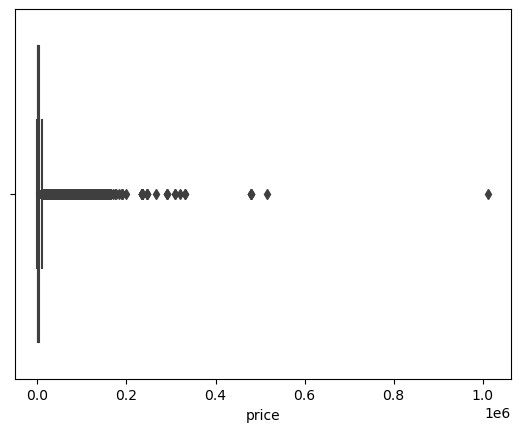

In [25]:
import seaborn as sns
sns.boxplot(df["price"] )

In [26]:
df["status"].value_counts()

complete          230457
canceled          197971
received           77152
order_refunded     58339
refund              7876
cod                 2851
paid                1156
closed               492
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
Name: status, dtype: int64

# we will be needing to categories the status

In [27]:
status_list = ['closed','payment_review','pending','processing','holded','fraud','pending_paypal','exchange','\\N']
for col in status_list:
    df = df[df['status'] != col]
replace_dict = {'order_refunded':'refund','received':'complete','cod':'complete','paid':'complete'}

df['status'].replace(replace_dict, inplace=True)
df['status'].value_counts()

complete    311616
canceled    197971
refund       66215
Name: status, dtype: int64

In [28]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month
count,575802.000000,5.758020e+05,575802.000000,5.758020e+05,575802.000000,575802.000000,575802.000000
mean,568868.757651,6.377498e+03,1.295221,8.581244e+03,503.397974,2017.054519,7.149484
std,199041.852984,1.499991e+04,3.999983,6.174696e+04,1510.767965,0.704015,3.488842
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000
25%,400903.500000,3.600000e+02,1.000000,9.519900e+02,0.000000,2017.000000,4.000000
50%,572623.500000,9.000000e+02,1.000000,1.984720e+03,0.000000,2017.000000,7.000000
75%,741066.500000,4.053000e+03,1.000000,6.997400e+03,164.979550,2018.000000,11.000000
max,905204.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000


In [29]:
expensive_item_orders = df[df['price'] > 1_000_000]
expensive_item_orders.head()

,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,FY
509081,821284.0,canceled,1012625.9,1.0,1012625.9,Beauty & Grooming,0.0,jazzvoucher,2018.0,4.0,2016-11,FY18


In [30]:
df=df.drop(509081)

In [31]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month
count,575801.000000,575801.000000,575801.000000,5.758010e+05,575801.000000,575801.000000,575801.000000
mean,568868.319279,6375.750334,1.295222,8.579500e+03,503.398849,2017.054517,7.149489
std,199041.747861,14941.191563,3.999987,6.173284e+04,1510.769131,0.704015,3.488843
min,211131.000000,0.000000,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000
25%,400903.000000,360.000000,1.000000,9.519900e+02,0.000000,2017.000000,4.000000
50%,572623.000000,900.000000,1.000000,1.984720e+03,0.000000,2017.000000,7.000000
75%,741065.000000,4053.000000,1.000000,6.997400e+03,164.980000,2018.000000,11.000000
max,905204.000000,515975.000000,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000


In [32]:
expensive_item_orders = df[df['price'] > 400_000]
expensive_item_orders.head(10)


,item_id,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,Customer Since,FY
207276,470222.0,canceled,479000.0,1.0,479000.0,Appliances,0.0,Easypay,2017.0,5.0,2017-5,FY17
207347,470297.0,canceled,479000.0,1.0,479000.0,Appliances,0.0,Easypay,2017.0,5.0,2017-5,FY17
251158,521539.0,canceled,479000.0,1.0,479000.0,Appliances,0.0,Easypay,2017.0,6.0,2017-6,FY17
251159,521542.0,refund,479000.0,1.0,479000.0,Appliances,0.0,Payaxis,2017.0,6.0,2017-6,FY17
309775,588634.0,canceled,515975.0,1.0,513975.0,Entertainment,2000.0,Payaxis,2017.0,10.0,2017-8,FY18


In [33]:
status = df[df['price'] > 10000][['status']]

In [34]:
status['status'].value_counts()

canceled    56819
complete    37625
refund       7581
Name: status, dtype: int64

In [35]:
df['payment_method'].value_counts()

cod                  267369
Payaxis               96146
Easypay               82665
jazzwallet            34310
easypay_voucher       31048
bankalfalah           22972
jazzvoucher           15088
Easypay_MA            13945
customercredit         7482
apg                    1758
ublcreditcard           821
mygateway               635
mcblite                 532
cashatdoorstep          464
internetbanking         436
productcredit           109
financesettlement        15
marketingexpense          6
Name: payment_method, dtype: int64

In [36]:
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'productcredit',
       'financesettlement', 'Payaxis', 'marketingexpense', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [37]:
payment_type = ['cod', 'ublcreditcard', 'mygateway', 'customercredit',
                'cashatdoorstep', 'mcblite', 'internetbanking', 'productcredit',
                'financesettlement', 'Payaxis', 'marketingexpense', 'jazzvoucher',
                'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
                'bankalfalah', 'apg']

categories = {'cod': 'cod',
              'Payaxis': 'Payaxis',
              'Easypay': 'Easypay',
              'jazzwallet': 'jazzwallet',
              'easypay_voucher': 'easypay_voucher',
              'bankalfalah': 'bankalfalah',
              'jazzvoucher': 'jazzvoucher',
              'Easypay_MA': 'Easypay_MA',
              'customercredit': 'customercredit'}

df['payment_method'] = df['payment_method'].apply(lambda x: categories[x] if x in categories else 'others')


In [38]:
df['payment_method'].unique()

array(['cod', 'others', 'customercredit', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah'], dtype=object)

In [39]:
df['payment_method'].value_counts()

cod                267369
Payaxis             96146
Easypay             82665
jazzwallet          34310
easypay_voucher     31048
bankalfalah         22972
jazzvoucher         15088
Easypay_MA          13945
customercredit       7482
others               4776
Name: payment_method, dtype: int64

In [40]:
df.to_csv("Cleaned_Ecomm_data.csv")

# Visualize payment method and order status frequency.

please prefer Dashboard

# One-Hot encoding

In [41]:
one_hot = pd.get_dummies(df[['status', 'category_name_1','Customer Since', 'payment_method','FY']],drop_first = True)

# merge the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# drop the original categorical columns
df.drop(['item_id','status', 'category_name_1','Customer Since', 'payment_method','FY'], axis=1, inplace=True)

In [42]:
df.to_csv(r"C:\PROJECT\BIA\Thane branch 2 Capstone project\ECom\ecom 3 - Vicky Dalvi\anil\intermediate.csv")

In [43]:
df.columns

Index(['price', 'qty_ordered', 'grand_total', 'discount_amount', 'Year',
       'Month', 'status_complete', 'status_refund',
       'category_name_1_Beauty & Grooming', 'category_name_1_Books',
       'category_name_1_Computing', 'category_name_1_Entertainment',
       'category_name_1_Health & Sports', 'category_name_1_Home & Living',
       'category_name_1_Kids & Baby', 'category_name_1_Men's Fashion',
       'category_name_1_Mobiles & Tablets', 'category_name_1_Others',
       'category_name_1_School & Education', 'category_name_1_Soghaat',
       'category_name_1_Superstore', 'category_name_1_Women's Fashion',
       'Customer Since_2016-11', 'Customer Since_2016-12',
       'Customer Since_2016-7', 'Customer Since_2016-8',
       'Customer Since_2016-9', 'Customer Since_2017-1',
       'Customer Since_2017-10', 'Customer Since_2017-11',
       'Customer Since_2017-12', 'Customer Since_2017-2',
       'Customer Since_2017-3', 'Customer Since_2017-4',
       'Customer Since_2017-5'

In [44]:
df.head()

,price,qty_ordered,grand_total,discount_amount,Year,Month,status_complete,status_refund,category_name_1_Beauty & Grooming,category_name_1_Books,...,payment_method_Payaxis,payment_method_bankalfalah,payment_method_cod,payment_method_customercredit,payment_method_easypay_voucher,payment_method_jazzvoucher,payment_method_jazzwallet,payment_method_others,FY_FY18,FY_FY19
0,1950.0,1.0,1950.0,0.0,2016.0,7.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,240.0,1.0,240.0,0.0,2016.0,7.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2450.0,1.0,2450.0,0.0,2016.0,7.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,360.0,1.0,60.0,300.0,2016.0,7.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,555.0,2.0,1110.0,0.0,2016.0,7.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
df = df.reset_index(drop=True)

In [51]:
df.head()

,price,qty_ordered,grand_total,discount_amount,Year,Month,status_complete,status_refund,category_name_1_Beauty & Grooming,category_name_1_Books,...,payment_method_Payaxis,payment_method_bankalfalah,payment_method_cod,payment_method_customercredit,payment_method_easypay_voucher,payment_method_jazzvoucher,payment_method_jazzwallet,payment_method_others,FY_FY18,FY_FY19
0,1950.0,1.0,1950.0,0.0,2016.0,7.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,360.0,1.0,60.0,300.0,2016.0,7.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,360.0,1.0,60.0,300.0,2016.0,7.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,170.0,1.0,170.0,0.0,2016.0,7.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5500.0,1.0,5500.0,0.0,2016.0,7.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
df.shape

(311616, 58)

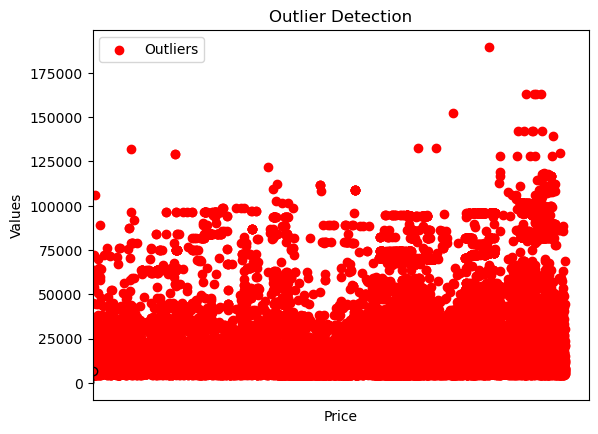

In [57]:

# Calculate the IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Plot the outliers
plt.boxplot(df['price'])
plt.scatter(outliers.index, outliers['price'], color='r', label='Outliers')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Values')
plt.title('Outlier Detection')
plt.show()


In [58]:
df.to_csv(r"C:\PROJECT\BIA\Thane branch 2 Capstone project\ECom\ecom 3 - Vicky Dalvi\anil\model_for_ecomm1.csv")


In [59]:
df.columns

Index(['price', 'qty_ordered', 'grand_total', 'discount_amount', 'Year',
       'Month', 'status_complete', 'status_refund',
       'category_name_1_Beauty & Grooming', 'category_name_1_Books',
       'category_name_1_Computing', 'category_name_1_Entertainment',
       'category_name_1_Health & Sports', 'category_name_1_Home & Living',
       'category_name_1_Kids & Baby', 'category_name_1_Men's Fashion',
       'category_name_1_Mobiles & Tablets', 'category_name_1_Others',
       'category_name_1_School & Education', 'category_name_1_Soghaat',
       'category_name_1_Superstore', 'category_name_1_Women's Fashion',
       'Customer Since_2016-11', 'Customer Since_2016-12',
       'Customer Since_2016-7', 'Customer Since_2016-8',
       'Customer Since_2016-9', 'Customer Since_2017-1',
       'Customer Since_2017-10', 'Customer Since_2017-11',
       'Customer Since_2017-12', 'Customer Since_2017-2',
       'Customer Since_2017-3', 'Customer Since_2017-4',
       'Customer Since_2017-5'

In [61]:
df.corr()

,price,qty_ordered,grand_total,discount_amount,Year,Month,status_complete,status_refund,category_name_1_Beauty & Grooming,category_name_1_Books,...,payment_method_Payaxis,payment_method_bankalfalah,payment_method_cod,payment_method_customercredit,payment_method_easypay_voucher,payment_method_jazzvoucher,payment_method_jazzwallet,payment_method_others,FY_FY18,FY_FY19
price,1.000000,-0.019175,0.201487,0.651297,0.147200,-0.016595,NaN,NaN,-0.101935,-0.023707,...,0.079629,0.081562,-0.299454,-0.003896,0.350253,0.104594,-0.056744,0.000043,0.161007,0.011590
qty_ordered,-0.019175,1.000000,0.842149,-0.010253,0.041220,-0.034167,NaN,NaN,0.003965,0.003569,...,0.015175,0.018926,-0.039545,-0.005067,-0.002200,0.008020,0.017241,0.006978,0.017608,0.006931
grand_total,0.201487,0.842149,1.000000,0.121816,0.040691,-0.013692,NaN,NaN,-0.022201,-0.005573,...,0.020246,0.030775,-0.064568,-0.015424,0.066383,0.034692,-0.014413,0.005617,0.032185,0.007432
discount_amount,0.651297,-0.010253,0.121816,1.000000,0.179558,-0.046041,NaN,NaN,-0.075151,-0.021040,...,0.106614,0.004470,-0.300095,-0.038844,0.335286,0.095513,-0.017258,-0.017420,0.200230,-0.018021
Year,0.147200,0.041220,0.040691,0.179558,1.000000,-0.624843,NaN,NaN,-0.074978,-0.000905,...,0.051578,0.197384,-0.178296,0.024160,0.082219,-0.030996,-0.130352,-0.034476,0.603418,0.263462
Month,-0.016595,-0.034167,-0.013692,-0.046041,-0.624843,1.000000,NaN,NaN,0.030306,-0.009468,...,-0.085767,-0.053299,-0.029197,-0.020824,0.132260,0.036894,0.056639,0.004121,-0.005809,0.019991
status_complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_refund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_name_1_Beauty & Grooming,-0.101935,0.003965,-0.022201,-0.075151,-0.074978,0.030306,NaN,NaN,1.000000,-0.020419,...,-0.053140,-0.013376,0.088607,0.003249,-0.062828,-0.010324,0.001686,-0.003682,-0.053153,0.001821
category_name_1_Books,-0.023707,0.003569,-0.005573,-0.021040,-0.000905,-0.009468,NaN,NaN,-0.020419,1.000000,...,-0.017097,-0.005209,0.036691,-0.000242,-0.014292,-0.004057,-0.014176,0.000614,-0.007219,-0.000217



# ML Model fitting

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Lasso regression model with different regularization strengths
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha: {alpha}, Train score: {train_score:.3f}, Test score: {test_score:.3f}, MSE: {mse:.3f}")


Alpha: 0.001, Train score: 0.570, Test score: 0.576, MSE: 38911990.050
Alpha: 0.01, Train score: 0.570, Test score: 0.576, MSE: 38912040.649
Alpha: 0.1, Train score: 0.570, Test score: 0.576, MSE: 38912551.135
Alpha: 1, Train score: 0.570, Test score: 0.576, MSE: 38917724.567
Alpha: 10, Train score: 0.570, Test score: 0.575, MSE: 38969680.193
Alpha: 100, Train score: 0.563, Test score: 0.564, MSE: 40005957.449
Alpha: 1000, Train score: 0.474, Test score: 0.464, MSE: 49173888.954


In [63]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [64]:
#Splitting the data into training and testing sets

X = df.drop('price', axis=1)  # independent variables
y = df['price']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X

,qty_ordered,grand_total,discount_amount,Year,Month,status_complete,status_refund,category_name_1_Beauty & Grooming,category_name_1_Books,category_name_1_Computing,...,payment_method_Payaxis,payment_method_bankalfalah,payment_method_cod,payment_method_customercredit,payment_method_easypay_voucher,payment_method_jazzvoucher,payment_method_jazzwallet,payment_method_others,FY_FY18,FY_FY19
0,1.0,1950.0,0.0,2016.0,7.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,60.0,300.0,2016.0,7.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,60.0,300.0,2016.0,7.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,170.0,0.0,2016.0,7.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,5500.0,0.0,2016.0,7.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311611,1.0,0.0,0.0,2018.0,8.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
311612,1.0,0.0,0.0,2018.0,8.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
311613,1.0,550.0,0.0,2018.0,8.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
311614,1.0,649.0,0.0,2018.0,8.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [66]:
X.describe()

,qty_ordered,grand_total,discount_amount,Year,Month,status_complete,status_refund,category_name_1_Beauty & Grooming,category_name_1_Books,category_name_1_Computing,...,payment_method_Payaxis,payment_method_bankalfalah,payment_method_cod,payment_method_customercredit,payment_method_easypay_voucher,payment_method_jazzvoucher,payment_method_jazzwallet,payment_method_others,FY_FY18,FY_FY19
count,311616.000000,3.116160e+05,311616.000000,311616.000000,311616.000000,311616.0,311616.0,311616.000000,311616.000000,311616.000000,...,311616.000000,311616.000000,311616.000000,311616.000000,311616.000000,311616.000000,311616.000000,311616.000000,311616.000000,311616.000000
mean,1.253280,5.165937e+03,480.653523,2017.009627,7.194274,1.0,0.0,0.088038,0.004300,0.023237,...,0.101802,0.019043,0.620055,0.019161,0.058501,0.020737,0.053961,0.004592,0.513116,0.033429
std,2.935261,4.681192e+04,1452.476369,0.699077,3.524126,0.0,0.0,0.283350,0.065435,0.150655,...,0.302388,0.136675,0.485374,0.137092,0.234690,0.142503,0.225940,0.067610,0.499829,0.179754
min,1.000000,-1.594000e+03,0.000000,2016.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.990000e+02,0.000000,2017.000000,4.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.489000e+03,0.000000,2017.000000,7.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,4.091738e+03,141.494925,2017.000000,11.000000,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,1.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y

0         1950.0
1          360.0
2          360.0
3          170.0
4         5500.0
           ...  
311611    1299.0
311612     999.0
311613     400.0
311614     499.0
311615     699.0
Name: price, Length: 311616, dtype: float64

In [69]:
#Initializing a linear regression model
model = LinearRegression()

In [70]:
#Training the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [71]:
#Making the predictions on the testing set
y_pred = model.predict(X_test)

In [72]:
#Evaluating the performance of the model using metrics such as r-squared and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('MSE:', mse)

R-squared: 0.5757606461175091
MSE: 38911984.43058834


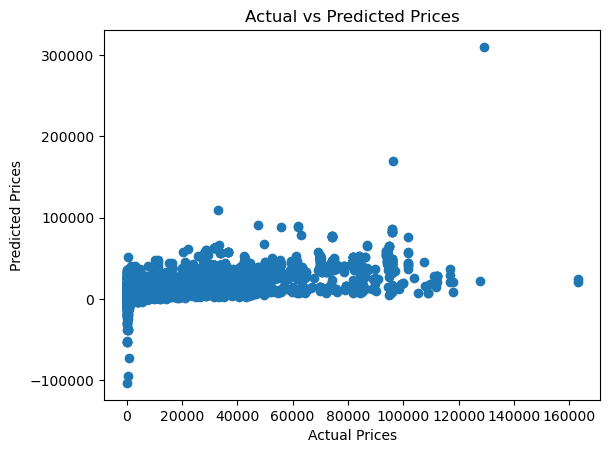

In [73]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv(r'C:\PROJECT\BIA\Thane branch 2 Capstone project\ECom\ecom 3 - Vicky Dalvi\streamlit.csv')
df.drop(['status_refund','status_complete'],inplace = True,axis = 1)

X = df.drop('price', axis=1)
y = df['price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest regression model
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the model using R-squared and mean squared error metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean squared error:', mse)

R-squared: 0.7501186060908317
Mean squared error: 22919563.73283683


In [75]:
df.shape

(311616, 56)

In [76]:
import pickle

with open('rf_model_updated.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
from sklearn.model_selection import cross_val_score

# Split data into X and y
X = df.drop('price', axis=1)
y = df['price']

# Instantiate random forest model
rf = RandomForestRegressor(n_estimators=100)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

r2 = r2_score(y_test, y_pred)

# Calculate mean squared error for each fold
mse_scores = -1 * cv_scores
print('MSE scores:', mse_scores)
print('Mean MSE:', np.mean(mse_scores))
print('R-squared Score:', r2)

Learning curves:
Learning curves involve plotting the model's training and validation error as a function of the number of training examples.
If the training error is much lower than the validation error and the gap between the two is large, 
then the model may be overfitting. If both errors are high and close together, then the model may be underfitting.

In [80]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
import statsmodels.api as sm
lm1 = sm.OLS(y_train,X_train).fit()


In [84]:
# Calculate the R-squared score of the model on the training and testing sets
train_score = lm1.rsquared
test_score = 1 - ((1 - lm1.rsquared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Print the train and test score of the model
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.5954360790420247
Test score: 0.5950787363354548



# Deployment

In [ ]:
#X.drop('grand_total',axis=1,inplace = True)

In [ ]:
X.head()

In [ ]:
import pickle
from flask import Flask, request, jsonify

# Load the saved model
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Create a Flask application
app = Flask(__name__)

# Create an endpoint for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.get_json(force=True)

    # Prepare the input data for prediction
    # ...

    # Make the prediction using the loaded model
    prediction = model.predict(data)

    # Return the predicted output as JSON
    return jsonify(prediction.tolist())

# Run the Flask application
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

# Load the trained model
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Create a Flask app
app = Flask(__name__)

# Define the endpoint for predicting prices
@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the request
    data = request.get_json()
    # Create a dataframe from the data
    df = pd.DataFrame(data, index=[0])
    # Use the model to make a prediction
    prediction = model.predict(df)[0]
    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
import requests

# Define the data to predict on
data = {
    'qty_ordered': 2,
    'grand_total': 100,
    'discount_amount': 10,
    'category_name_1_freq': 0.2,
    'payment_method_freq': 0.3,
    'status_freq': 0.1,
    'M-Y_freq': 0.4,
    'FY_freq': 0.5
}

# Make a POST request to the Flask app to get the prediction
response = requests.post('http://localhost:5000/predict', json=data)

# Print the prediction
print(response.json()['prediction'])


In [ ]:
df.head()

In [ ]:
df.columns